In [9]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Cài Đặt Thư Viện**

In [10]:
!pip install --upgrade tensorflow

In [11]:
!pip install keras

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import PIL as pl
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AvgPool2D, MaxPooling2D, Flatten, Dense, Dropout
import os
import warnings
warnings.filterwarnings('ignore')

 **`Đọc Hình ảnh`**


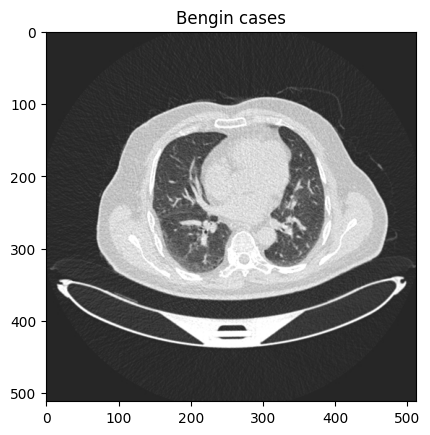

In [5]:
img = cv2.imread('/content/drive/MyDrive/lung_cnn/ lung_cancer_dataset/Bengin cases/Bengin case (1).jpg')
plt.title('Bengin cases')
plt.imshow(img, label = 'Bengin cases')

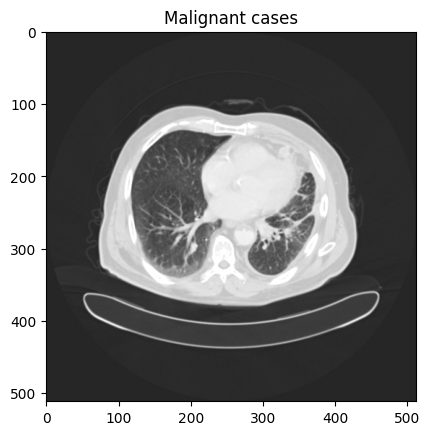

In [6]:
img = cv2.imread('/content/drive/MyDrive/lung_cnn/ lung_cancer_dataset/Malignant cases/Malignant case (1).jpg')
plt.title('Malignant cases')
plt.imshow(img, label = 'Malignant cases')

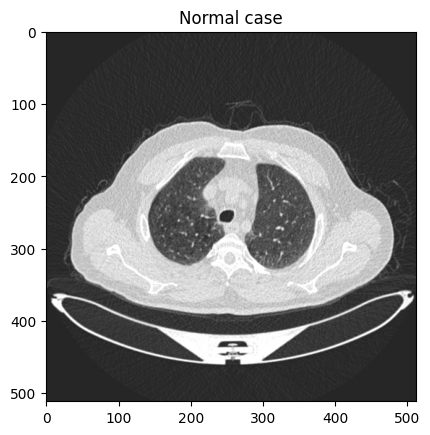

In [7]:
img = cv2.imread('/content/drive/MyDrive/lung_cnn/ lung_cancer_dataset/Normal cases/Normal case (1).jpg')
plt.title('Normal case')
plt.imshow(img, label = 'Normal cases')

In [8]:
img.shape

(512, 512, 3)

In [9]:
dir = '/content/drive/MyDrive/lung_cnn/ lung_cancer_dataset'
img_width = 256
img_height = 256

**Xử lý hình ảnh**

In [ ]:

categories = ['Bengin cases', 'Malignant cases', 'Normal cases']

# lấy hình ảnh bằng đường dẫn đầy đủ và lưu trữ hình ảnh vào thư mục img_data.
img_data = []
for cata in categories:
    folder = os.path.join(dir, cata)
    label = categories.index(cata)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)

        try:
            # đọc và thay đổi kích thước hình ảnh
            img_array = cv2.imread(img_path)
            img_array = cv2.resize(img_array, (img_height, img_width))

            # Kiểm tra xem mảng hình ảnh có trống không
            if img_array is not None and not img_array.size == 0:
                img_data.append([img_array, label])
        except Exception as e:
            continue

In [ ]:
#Xáo trộn
random.shuffle(img_data)

In [ ]:
#Chuyển đổi thành mảng
x=[]
y=[]
for features,labels in img_data:
    x.append(features)
    y.append(labels)

#Chuyển đổi thành thư viện numpy để thích nghi với thư viện tensorflow , pytorch
X=np.array(x, dtype = float)
Y=np.array(y, dtype = float)

In [ ]:
print(X[19])

[[[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]

 ...

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]]


In [ ]:
for i in range(len(X)):
    X[i] = X[i]/255.0

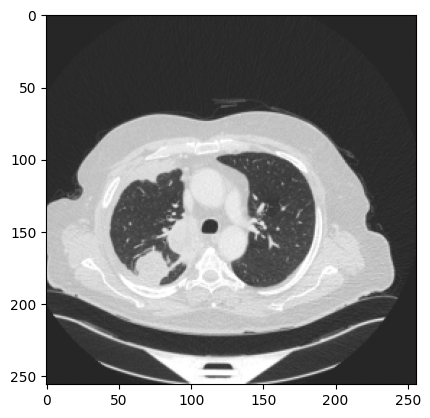

In [ ]:
plt.imshow(X[19])

In [ ]:
print(X[19])

[[[0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  ...
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]]

 [[0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  ...
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]]

 [[0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  ...
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]]

 ...

 [[0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  ...
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]]

 [[0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]


In [ ]:
X.shape

(1100, 256, 256, 3)

In [ ]:
x, x_test, y, y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2)

**Xây dựng mô hình**

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(128, (3, 3), padding = 'same', input_shape = X.shape[1: ], activation = 'relu'))
model.add(AvgPool2D(2,2))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dropout(0.2, seed = 12))
model.add(Dense(3000, activation = 'relu'))
model.add(Dense(1500, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 128, 128, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3000)                │      49,155,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1500)                │       4,501,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │           4,503 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,365,643 (207.39 MB)

 Trainable params: 54,365,643 (207.39 MB)

 Non-trainable params: 0 (0.00 B)

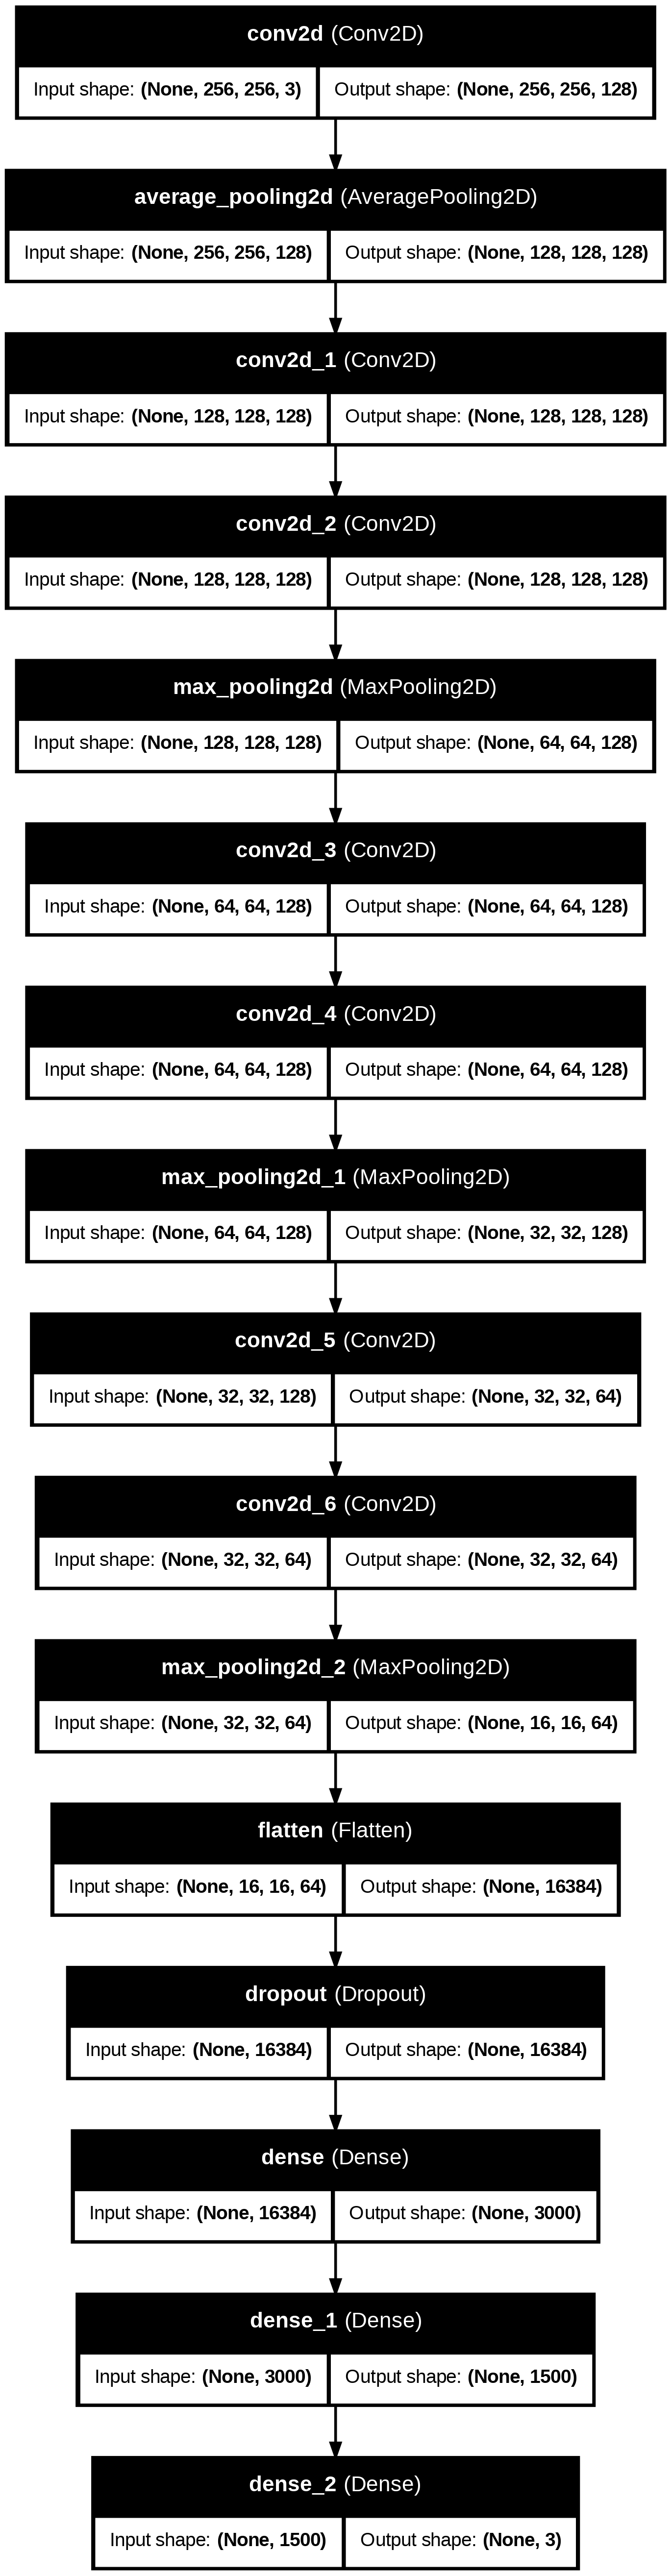

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(x_train, y_train, validation_data = (x_val, y_val),epochs = 15)

Epoch 1/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 504ms/step - accuracy: 0.4164 - loss: 1.1914 - val_accuracy: 0.5511 - val_loss: 0.9122
Epoch 2/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 18s 223ms/step - accuracy: 0.4882 - loss: 0.9794 - val_accuracy: 0.5511 - val_loss: 0.9239
Epoch 3/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 237ms/step - accuracy: 0.4975 - loss: 0.9492 - val_accuracy: 0.6591 - val_loss: 0.7420
Epoch 4/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 225ms/step - accuracy: 0.6505 - loss: 0.8072 - val_accuracy: 0.6989 - val_loss: 0.6793
Epoch 5/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 228ms/step - accuracy: 0.7086 - loss: 0.6766 - val_accuracy: 0.7955 - val_loss: 0.5453
Epoch 6/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 225ms/step - accuracy: 0.8183 - loss: 0.4842 - val_accuracy: 0.8523 - val_loss: 0.3295
Epoch 7/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 238ms/step - accuracy: 0.8922 - loss: 0.2756 - val_accuracy: 0.9375 - val_loss: 0.1724
Epoch 8/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 240ms/step - accuracy: 0.9585 - loss: 0.1072 - val_accuracy

In [ ]:
model.evaluate(x_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 962ms/step - accuracy: 0.9552 - loss: 0.1835


[0.20835499465465546, 0.9545454382896423]

In [ ]:
result = model.predict(x_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step


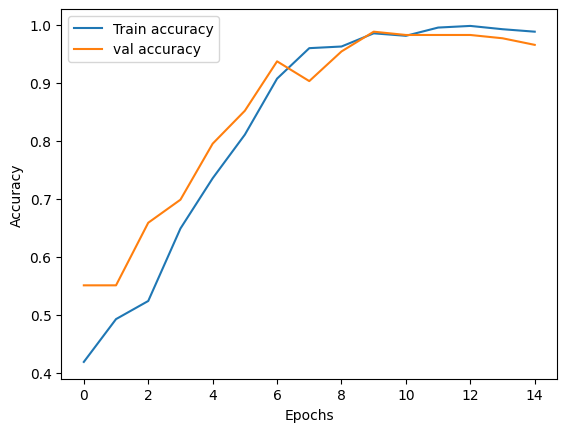

In [ ]:
plt.plot(history.history['accuracy'], label = 'Train accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')

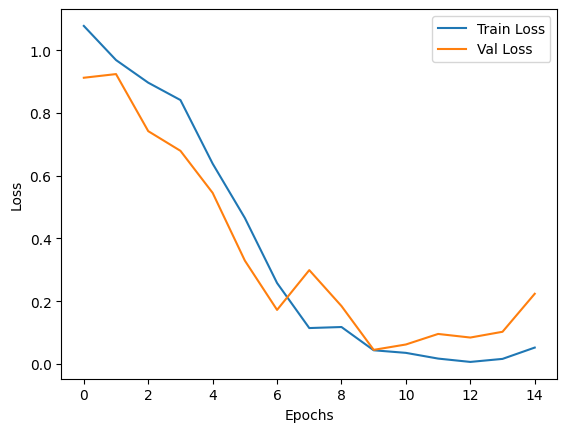

In [ ]:
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'best')

In [ ]:

# Đường dẫn để lưu mô hình trong Google Drive
model_save_path = '/content/drive/MyDrive/lung_cnn/lung_cancer_model.h5'

# Lưu mô hình
model.save(model_save_path)

print(f"Mô hình đã được lưu vào: {model_save_path}")


Mô hình đã được lưu vào: /content/drive/MyDrive/lung_cnn/lung_cancer_model.h5


In [13]:
# Tải mô hình đã lưu
model_save_path = '/content/drive/MyDrive/lung_cnn/lung_cancer_model.h5'
loaded_model = tf.keras.models.load_model(model_save_path)
print("Model loaded successfully.")

Model loaded successfully.


In [16]:
#Xử lý hình ảnh cần dự đoán
def process_image(img_path, target_size=(256, 256)):
    img = cv2.imread(img_path)
    img = cv2.resize(img, target_size)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    return img

# ảnh cần dự đoán
img_path = '/content/drive/MyDrive/lung_cnn/ lung_cancer_dataset/a little/1.jpg'
img_for_prediction = process_image(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted label: Normal cases


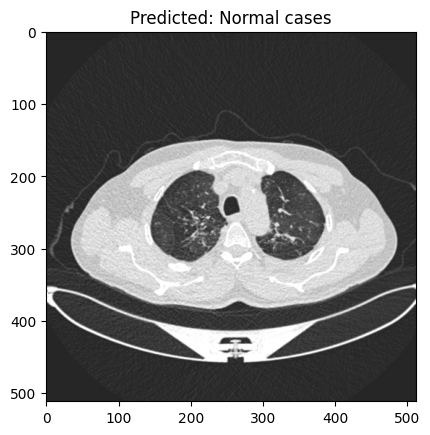

In [17]:
# dự đoán
prediction = loaded_model.predict(img_for_prediction)

# tìm chỉ số có xác suất cao nhất
predicted_class = np.argmax(prediction, axis=1)

#  danh sách nhãn theo thư mục, hãy ánh xạ chỉ mục được dự đoán vào danh mục tương ứng
categories = ['Bengin cases', 'Malignant cases', 'Normal cases']
predicted_label = categories[predicted_class[0]]


print(f"Predicted label: {predicted_label}")
plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
plt.title(f"Predicted: {predicted_label}")
plt.show()
